# Narrative analytics and experimentation

### Author:Nutan Mandale

### Mentor:Vincent Ramdhanie

### Data Description

In 2012, the Massachusetts Institute of Technology (MIT) and Harvard University launched open online courses on edX, a non-profit learning platform co-founded by the two institutions.The dataset contains data on 290 Harvard and MIT online courses, 250 thousand certifications, 4.5 million participants, and 28 million participant hours on the edX platform since 2012.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#import csv
appendix = pd.read_csv("./appendix.csv")
df = pd.DataFrame(appendix)

Regarding this data set we have an assumption that men are more inclined to the science and technology while women are more interested in social science and governance. With this dataset let us find out if our assumption is correct or not.
Let us analyse the courses tought by the two institutes.


H~0 = Men are more inclined to science and technology and computer science than female.


H~1 = There is no difference between the choice of subjects between men and women

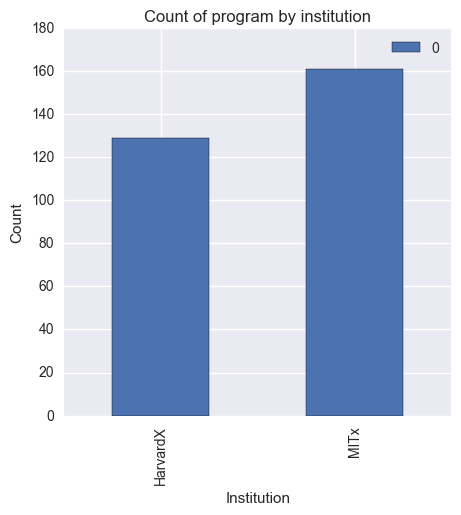

In [3]:
appendix.groupby(['Institution'], as_index = False).mean()
ax = appendix.groupby("Institution").size().to_frame().plot(kind='bar',figsize=(5,5))
ax.set_ylabel("Count")
ax.set_xlabel("Institution")
ax.set_title("Count of program by institution");

MITx have more programs than that of Harvard.

In [4]:
#Rename the participants column
df = df.rename(columns={'Participants (Course Content Accessed)':'Participants'})
df = df.rename(columns={'Audited (> 50% Course Content Accessed':'Audited'})

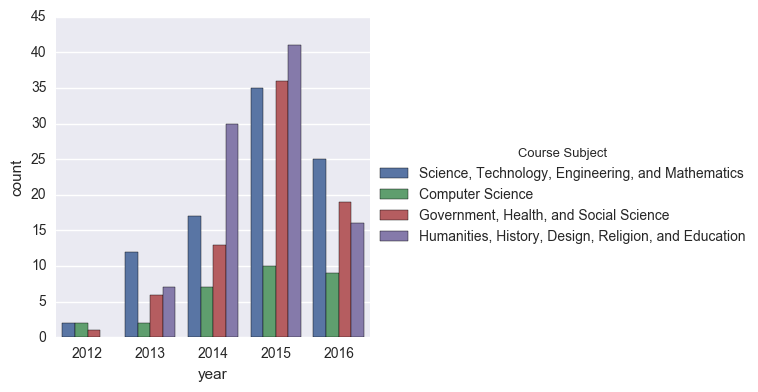

In [5]:
appendix['year'] = pd.to_datetime(appendix['Launch Date']).dt.year
sns.factorplot('year',data=appendix,hue='Course Subject',kind='count');

With this graph we can see that in 2015 highest number of courses were released on all the topics. AMong all the subjects courses on Humanities,History,Religion and Education were maximum.

Now let us see both the institutions seperately.

In [6]:
MIT_df = appendix[appendix.Institution == 'MITx']
harvard_df = appendix[appendix.Institution == 'HarvardX']

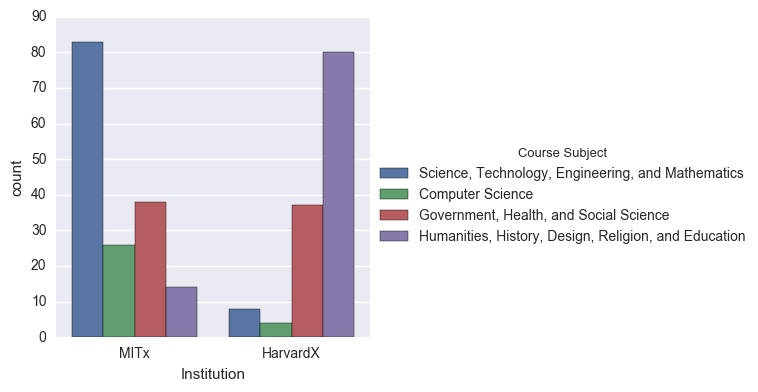

In [7]:
sns.factorplot('Institution',data=appendix,hue='Course Subject',kind='count');

It is clear MITx have more courses on Science ,Technology,Engineering and Mathematics while HarvardX have more courses on Humanities,History,Design,Religion and Education

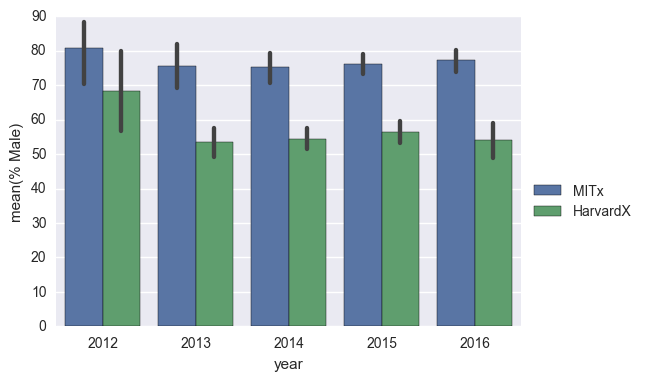

In [8]:
sns.barplot(x='year', y='% Male', hue="Institution", data=appendix)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

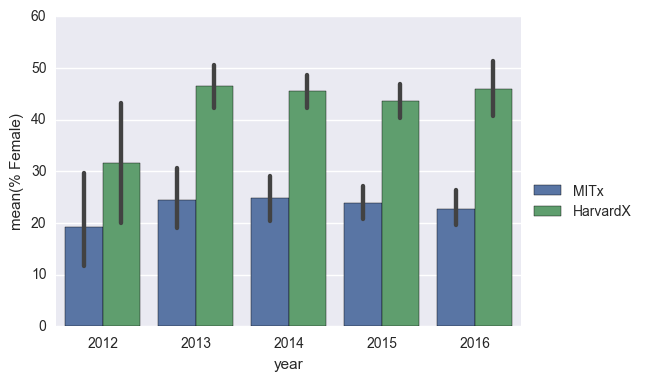

In [9]:
sns.barplot(x='year', y='% Female', hue="Institution", data=appendix)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

If we see the above 2 plots Harvard seems to be more popular among female while MIT is popular among male participants.

Now let us breakdown according to course subject 

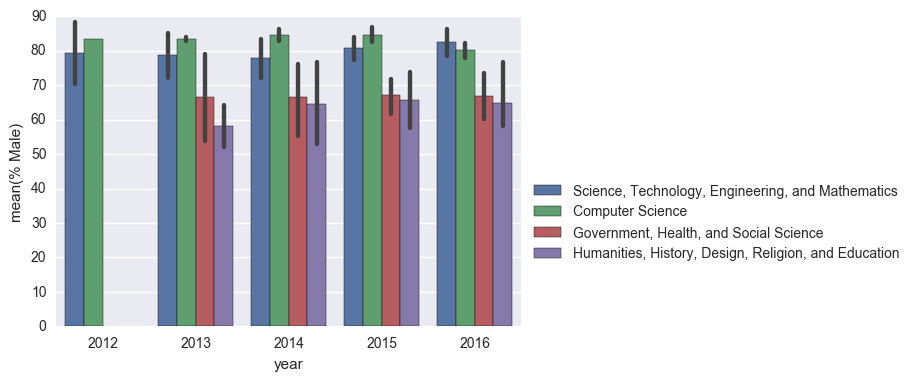

In [10]:
sns.barplot(x='year', y='% Male', hue='Course Subject', data= MIT_df)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

We see over the years Sceince ,Technology ,Engineering and Mathematics and Computer Science these 2 course subjects are consistently popular among male participants.

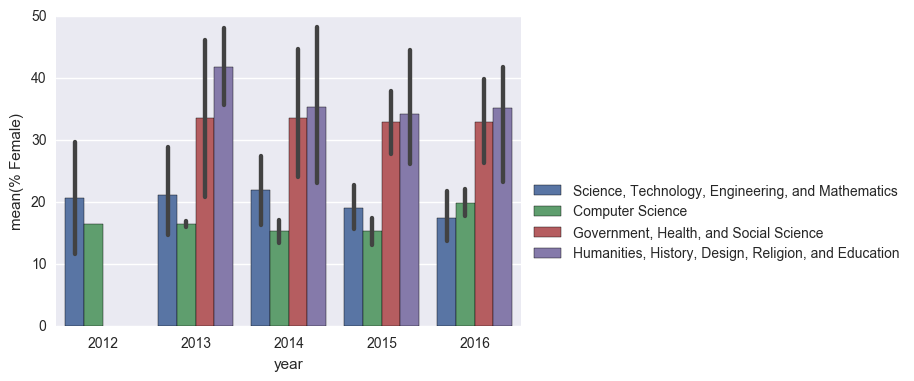

In [11]:
sns.barplot(x='year', y='% Female', hue='Course Subject', data= MIT_df)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

From this graph we find more female participants taking the course on Humanities,History and Social Science as well as Governemnt,Health and Social Science.

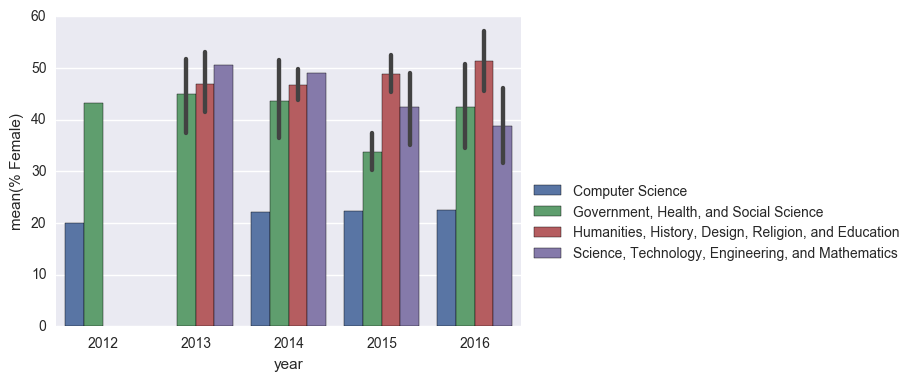

In [12]:
sns.barplot(x='year', y='% Female', hue='Course Subject', data= harvard_df)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

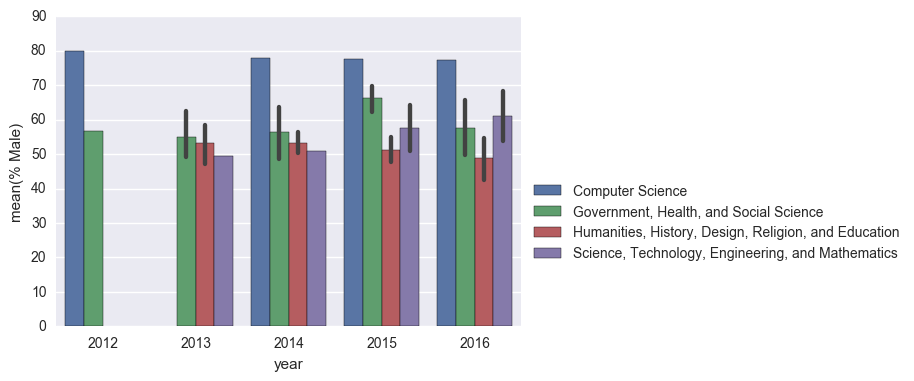

In [13]:
sns.barplot(x='year', y='% Male', hue='Course Subject', data= harvard_df)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

With the above plots it is very clear that we see more men taking courses on scinece,Technology and computer science while women choose Humanities,History,Design,Religion and Education.

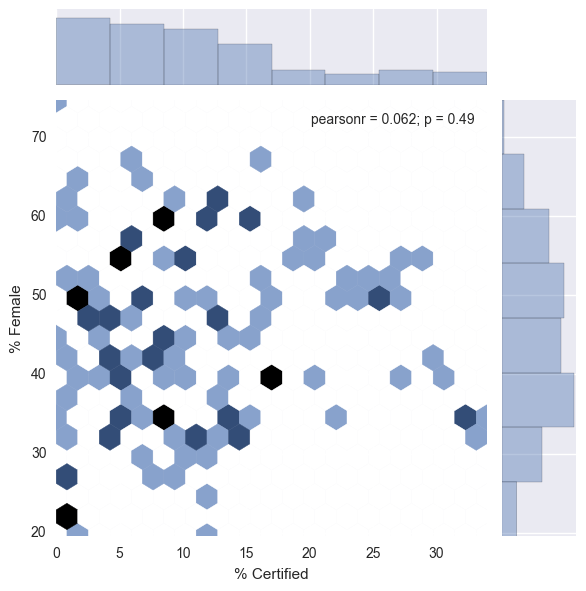

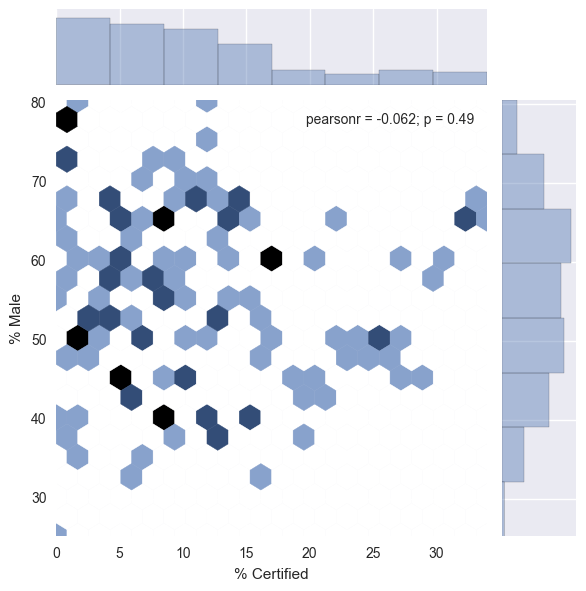

In [14]:
sns.jointplot(x='% Certified', y='% Female', kind = 'hex',gridsize=20, data= harvard_df)
sns.jointplot(x='% Certified', y='% Male',  kind = 'hex',gridsize=20,data= harvard_df);

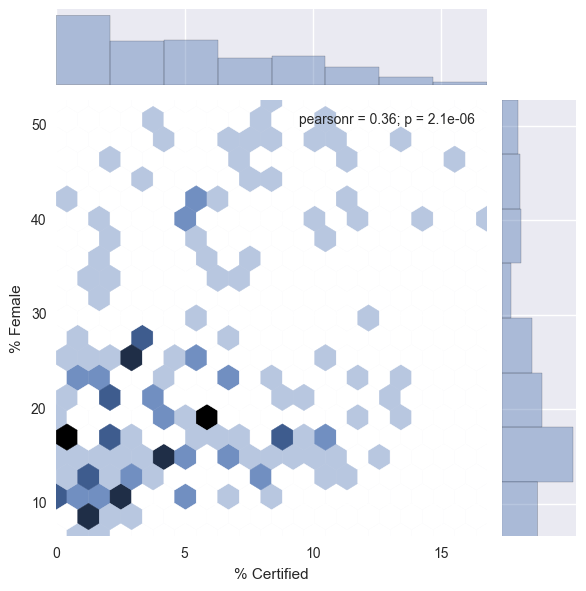

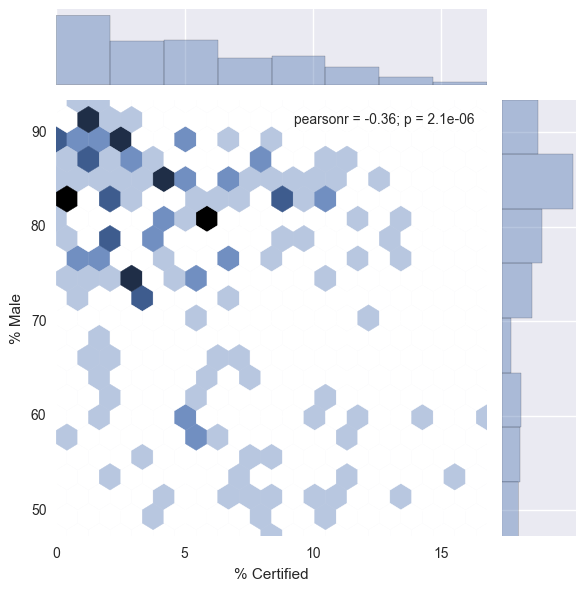

In [15]:
sns.jointplot(x='% Certified', y='% Female', kind = 'hex',gridsize=20, data= MIT_df)
sns.jointplot(x='% Certified', y='% Male', kind = 'hex',gridsize=20, data= MIT_df);

Now let us compare the median age of female and male participants different institutes.

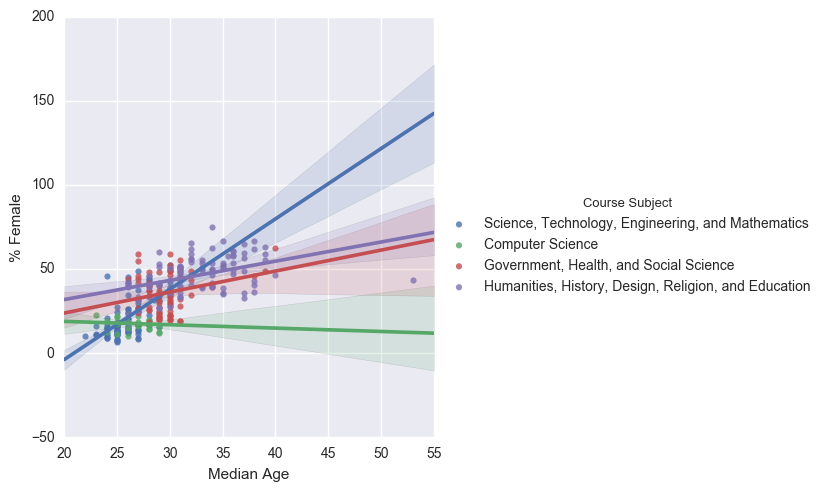

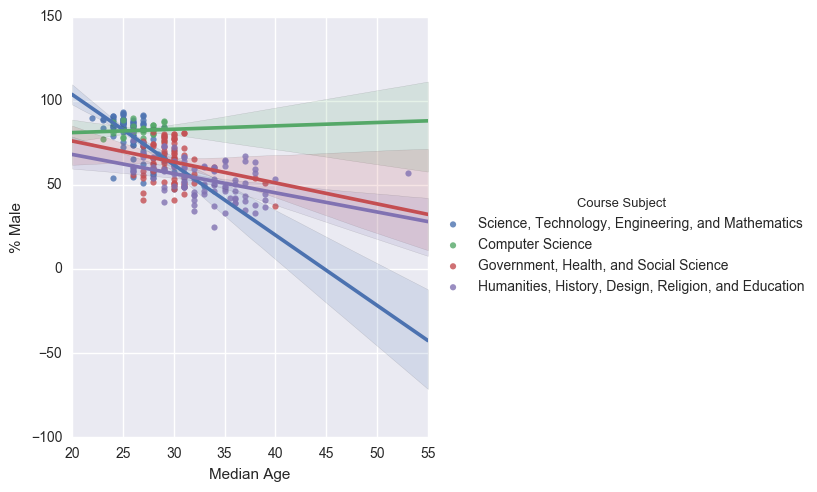

In [16]:
g = sns.lmplot(y='% Female', 
               x='Median Age',
               hue = 'Course Subject',
               data=appendix, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               )
g = sns.lmplot(y='% Male', 
               x='Median Age',
               hue = 'Course Subject',
               data=appendix, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               )

With this plot we can find some interesting conclusions. Older female are participating more in all subjects except computers while we find opposite in male.


In [17]:
dfmax = appendix[appendix['% Certified'] == appendix.groupby(['Course Subject'])['% Certified'].transform(max)]

In [18]:
dfmax.head()

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher,year
98,HarvardX,SW12.9x,11/20/2014,Communist Liberations,"Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",3,1,4248,1835,...,79.76,30.14,50.49,23.03,9.76,37.0,67.11,32.89,82.98,2014
193,HarvardX,SPU30x,10/13/2015,Super-Earths and Life,Dimitar Sasselov,"Science, Technology, Engineering, and Mathematics",4,1,29176,11250,...,51.96,26.62,52.35,109.00,13.47,26.0,60.09,39.91,44.95,2015
197,MITx,6.00.2x,10/20/2015,Introduction to Computational Thinking and Dat...,"Eric Grimson, John Guttag, Ana Bell",Computer Science,4,1,12426,2338,...,70.46,7.48,31.47,167.80,69.53,28.0,85.39,14.61,74.43,2015
218,HarvardX,PH557x,12/03/2015,Lessons from Ebola: Preventing the Next Pandemic,Ashish Jha,"Government, Health, and Social Science",4,1,3072,1479,...,70.54,14.71,39.62,14.21,12.82,27.0,45.49,54.51,70.64,2015


In [19]:
MIT_df = appendix[appendix.Institution == 'MITx']
harvard_df = appendix[appendix.Institution == 'HarvardX']
MIT_df = MIT_df.rename(columns={'Course Subject':'Subject'})
MIT_df = MIT_df.rename(columns={'% Male':'Male'})
MIT_df = MIT_df.rename(columns={'% Female':'Female'})
MIT_df = MIT_df.rename(columns={'Median Age':'age'})
MIT_df = MIT_df.rename(columns={'% Certified':'certified'})
MIT_df.columns

Index(['Institution', 'Course Number', 'Launch Date', 'Course Title',
       'Instructors', 'Subject', 'Year', 'Honor Code Certificates',
       'Participants (Course Content Accessed)',
       'Audited (> 50% Course Content Accessed)', 'Certified', '% Audited',
       'certified', '% Certified of > 50% Course Content Accessed',
       '% Played Video', '% Posted in Forum', '% Grade Higher Than Zero',
       'Total Course Hours (Thousands)', 'Median Hours for Certification',
       'age', 'Male', 'Female', '% Bachelor's Degree or Higher', 'year'],
      dtype='object')

In [20]:
computer_science_mit = MIT_df[MIT_df.Subject == 'Computer Science']

In [21]:
F,p = stats.f_oneway(
    computer_science_mit['Male'],
    computer_science_mit['Female']    
)
print(F)
print(p)

4498.05495137
1.20558806108e-50


Since the value of p < 0.05 here we see that there is great difference in population

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


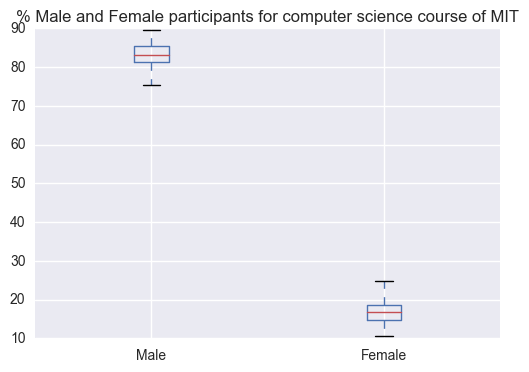

In [22]:
computer_science_mit.boxplot(['Male','Female'])
plt.title('% Male and Female participants for computer science course of MIT')
plt.show();

In [23]:
gov_health_mit = MIT_df[MIT_df.Subject == 'Government, Health, and Social Science']
gov_health_mit.shape

(38, 24)

In [24]:
F,p = stats.f_oneway(
    gov_health_mit['Male'],
    gov_health_mit['Female']    
)
print(F)
print(p)

150.35450001
1.68648778047e-19


C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


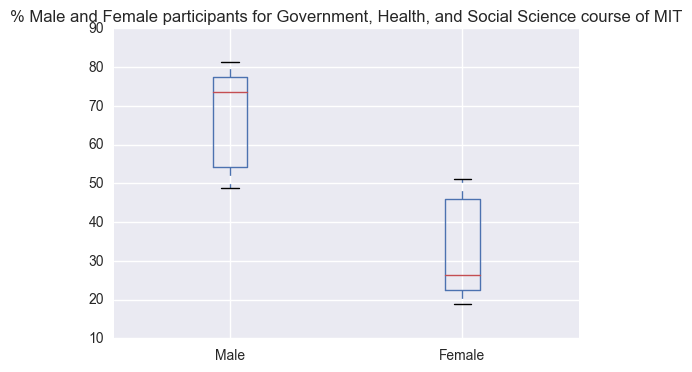

In [25]:
gov_health_mit.boxplot(['Male','Female'])
plt.title('% Male and Female participants for Government, Health, and Social Science course of MIT')
plt.show();

In [26]:
humanities_mit = MIT_df[MIT_df.Subject == 'Humanities, History, Design, Religion, and Education']
humanities_mit.shape

(14, 24)

In [27]:
F,p = stats.f_oneway(
    humanities_mit['Male'],
    humanities_mit['Female']    
)
print(F)
print(p)

47.9014245046
2.39070703084e-07


C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


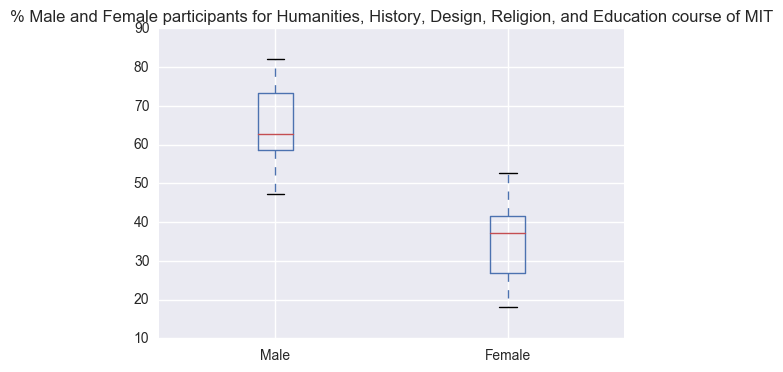

In [28]:
humanities_mit.boxplot(['Male','Female'])
plt.title('% Male and Female participants for Humanities, History, Design, Religion, and Education course of MIT')
plt.show();

In [29]:
science_tech_mit = MIT_df[MIT_df.Subject == 'Science, Technology, Engineering, and Mathematics']
science_tech_mit.shape

(83, 24)

In [30]:
F,p = stats.f_oneway(
    science_tech_mit['Male'],
    science_tech_mit['Female']    
)
print(F)
print(p)

1420.44880962
1.10780414247e-82


C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


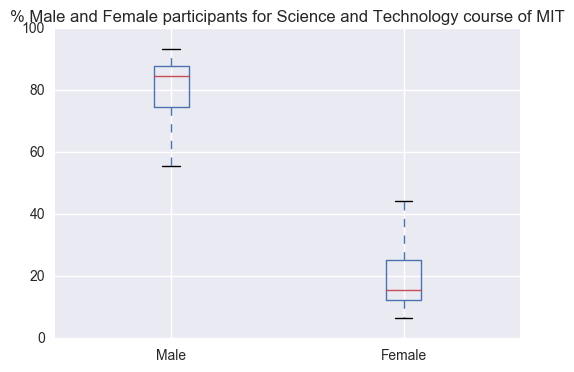

In [31]:
science_tech_mit.boxplot(['Male','Female'])
plt.title('% Male and Female participants for Science and Technology course of MIT')
plt.show();

We analysed the courses of MIT.We have observed that there is overall less participation of female participants than that of male.
Yet we see in Science and Technology course and Computer Science large difference in population.

Let us analyse the other institute Harvard


In [32]:
harvard_df = harvard_df.rename(columns={'Course Subject':'Subject'})
harvard_df = harvard_df.rename(columns={'% Male':'Male'})
harvard_df = harvard_df.rename(columns={'% Female':'Female'})
harvard_df = harvard_df.rename(columns={'Median Age':'age'})
harvard_df = harvard_df.rename(columns={'% Certified':'certified'})
harvard_df.columns

Index(['Institution', 'Course Number', 'Launch Date', 'Course Title',
       'Instructors', 'Subject', 'Year', 'Honor Code Certificates',
       'Participants (Course Content Accessed)',
       'Audited (> 50% Course Content Accessed)', 'Certified', '% Audited',
       'certified', '% Certified of > 50% Course Content Accessed',
       '% Played Video', '% Posted in Forum', '% Grade Higher Than Zero',
       'Total Course Hours (Thousands)', 'Median Hours for Certification',
       'age', 'Male', 'Female', '% Bachelor's Degree or Higher', 'year'],
      dtype='object')

In [33]:
computer_science_h = harvard_df[harvard_df.Subject == 'Computer Science']
computer_science_h.shape

(4, 24)

In [34]:
F,p = stats.f_oneway(
    computer_science_h ['Male'],
    computer_science_h['Female']    
)
print(F)
print(p)

4516.24543542
7.30226489124e-10


C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


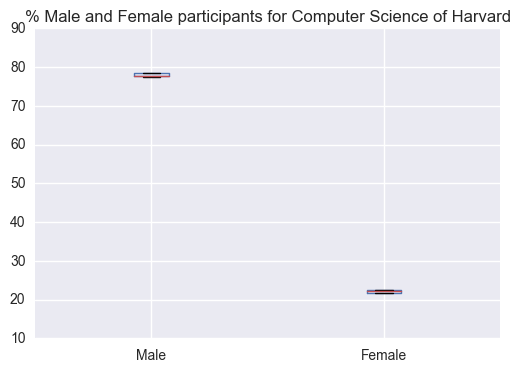

In [35]:
computer_science_h.boxplot(['Male','Female'])
plt.title('% Male and Female participants for Computer Science of Harvard')
plt.show();

Here in this course we see value of p is very less than 0.05.Hence there is large difference in population.

In [36]:
gov_health_h = harvard_df[harvard_df.Subject == 'Government, Health, and Social Science']
gov_health_h.shape

(37, 24)

In [37]:
F,p = stats.f_oneway(
    gov_health_h ['Male'],
    gov_health_h ['Female']    
)
print(F)
print(p)

79.0026865381
3.37101963513e-13


C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


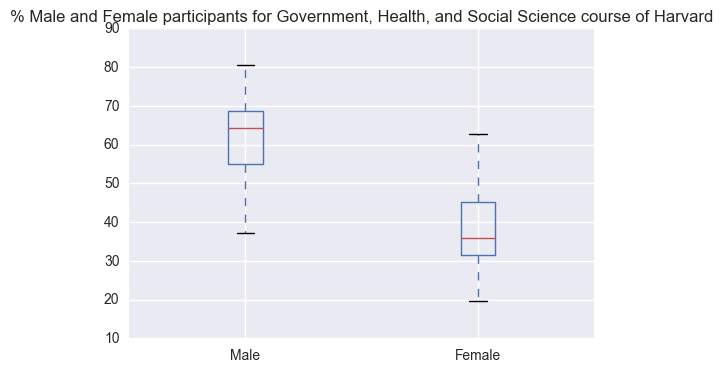

In [38]:
gov_health_h.boxplot(['Male','Female'])
plt.title('% Male and Female participants for Government, Health, and Social Science course of Harvard')
plt.show();

In [39]:
humanities_h = harvard_df[harvard_df.Subject == 'Humanities, History, Design, Religion, and Education']
humanities_h.shape

(80, 24)

In [40]:
F,p = stats.f_oneway(
    humanities_h ['Male'],
    humanities_h ['Female']    
)
print(F)
print(p)

3.90174750031
0.0499779927092


C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


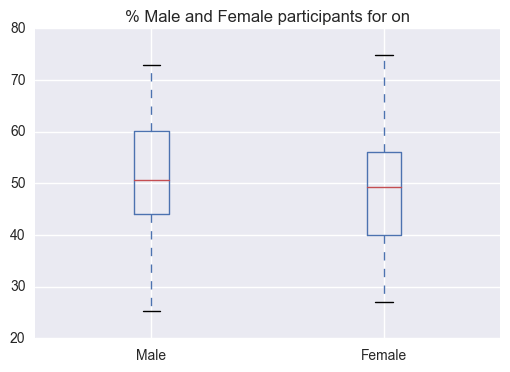

In [41]:
humanities_h.boxplot(['Male','Female'])
plt.title('% Male and Female participants for on')
plt.show();

In this course p value is almost close to 0.05.
In the boxplot we can see the population is almost same.

In [43]:
science_tech_h = harvard_df[harvard_df.Subject == 'Science, Technology, Engineering, and Mathematics']
science_tech_h.shape

(8, 24)

In [44]:
F,p = stats.f_oneway(
    science_tech_h['Male'],
    science_tech_h['Female']    
)
print(F)
print(p)

10.560089233
0.00581699344444


C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


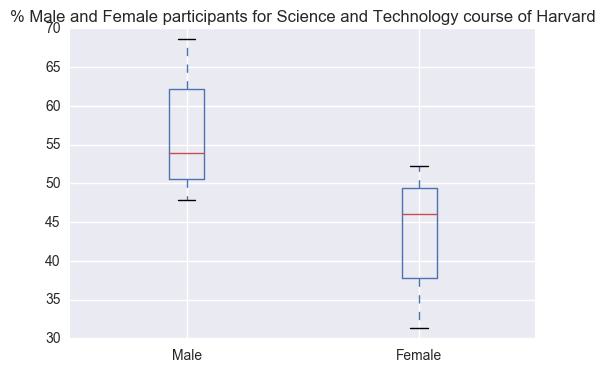

In [45]:
science_tech_h.boxplot(['Male','Female'])
plt.title('% Male and Female participants for Science and Technology course of Harvard')
plt.show();

In Science and Technology we see p < 0.05.Also we see great difference in the population.

### Summary

In this experiment we had the hypothesis that out of the participents who have enrolled for the courses of MIT and Harvard male participents are more interested to the courses based on science and technology as well as computer scinece.

We divided the data into 2 groups based on the institutes.We found that MIT have more courses on Computer Science and Science and Technology while Harvard have less courses on this topic.
We also observed some interesting facts that older females are more interested in learning than men.

Lastly when we applied ANOVA test to our dataset we found that except for courses on Humanities, History, Design, Religion, and Education course of Harvardall other courses showed vast difference in population and probability < 0.05.

This brings us to the conclusion that the asuumption that male are more inclined to Computer science and Science and technology as compared to female.